In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Functions_Vincent import *
from functions import *

from sklearn import preprocessing

pd.options.display.max_columns = 50
pd.options.display.max_rows = 100
pd.set_option('display.width', 1000)

#Types de couleurs utilisées pour les comparaisons de grade
colors=["limegreen", "red","steelblue","purple","black","pink","darkorange"]

from matplotlib import style
#style.use('dark_background')
style.use('default')

In [179]:
Df= pd.read_csv('Df_final.csv')


#Df2 is the Df I will use to create the clusters
List_features = ['seller_id','seller_city', 'seller_state',   'seller_zip_code_prefix', 'number_of_sales', 
                 'sum_price','mean_review_score','number_of_categories',  '_seller_distance_to_sao_paulo',
                 'freight_value_sum', 'number_item_mean', 'real_deliv_time_mean', 'estim_deliv_time_mean',
                 'real_minus_estim_mean',
                 'number_of_product','mean_price','mean_weight','nb_sell_3m', 'nb_sell_6m', 'nb_sell_12m', 
                 'nb_sell_18m','mean_rev_score_3m', 'mean_rev_score_6m', 'mean_rev_score_12m', 'mean_rev_score_18m']

Df2=Df[List_features].drop_duplicates()


#Lets renames colums to see better duing The CPA
cols_names= ['seller','seller_city', 'seller_state', 'seller_zip_code', 'nb_of_sales', 'sum_price', 
             'mean_rev_score', 
             'nb_of_cat','seller_distance_Sao_P', 'freight_sum', 'nb_item_mean', 'real_time_mean', 'estim_time_mean',
             'real_minus_estim_mean',  'nb_of_product','mean_price','mean_weight','nb_sell_3m', 'nb_sell_6m', 
             'nb_sell_12m', 'nb_sell_18m',
                 'mean_rev_score_3m', 'mean_rev_score_6m', 'mean_rev_score_12m', 'mean_rev_score_18m']

Df2.columns = cols_names 
Df2=pd.merge(Df2,Df[['seller_id','real_minus_estim_mean']],left_on='seller',right_on='seller_id').drop_duplicates()
Df2=Df2.rename({"real_minus_estim_mean_x":"real_minus_estim_mean"}, axis='columns')
Df2=Df2.drop("real_minus_estim_mean_y", axis=1)
Df2.index=Df2.seller
Df2 = Df2.drop(['seller','seller_id'],axis=1)
Df2["freight_part"]= round(Df2.freight_sum/(Df2.freight_sum+Df2.sum_price),3)
Df2= Df2.drop_duplicates()

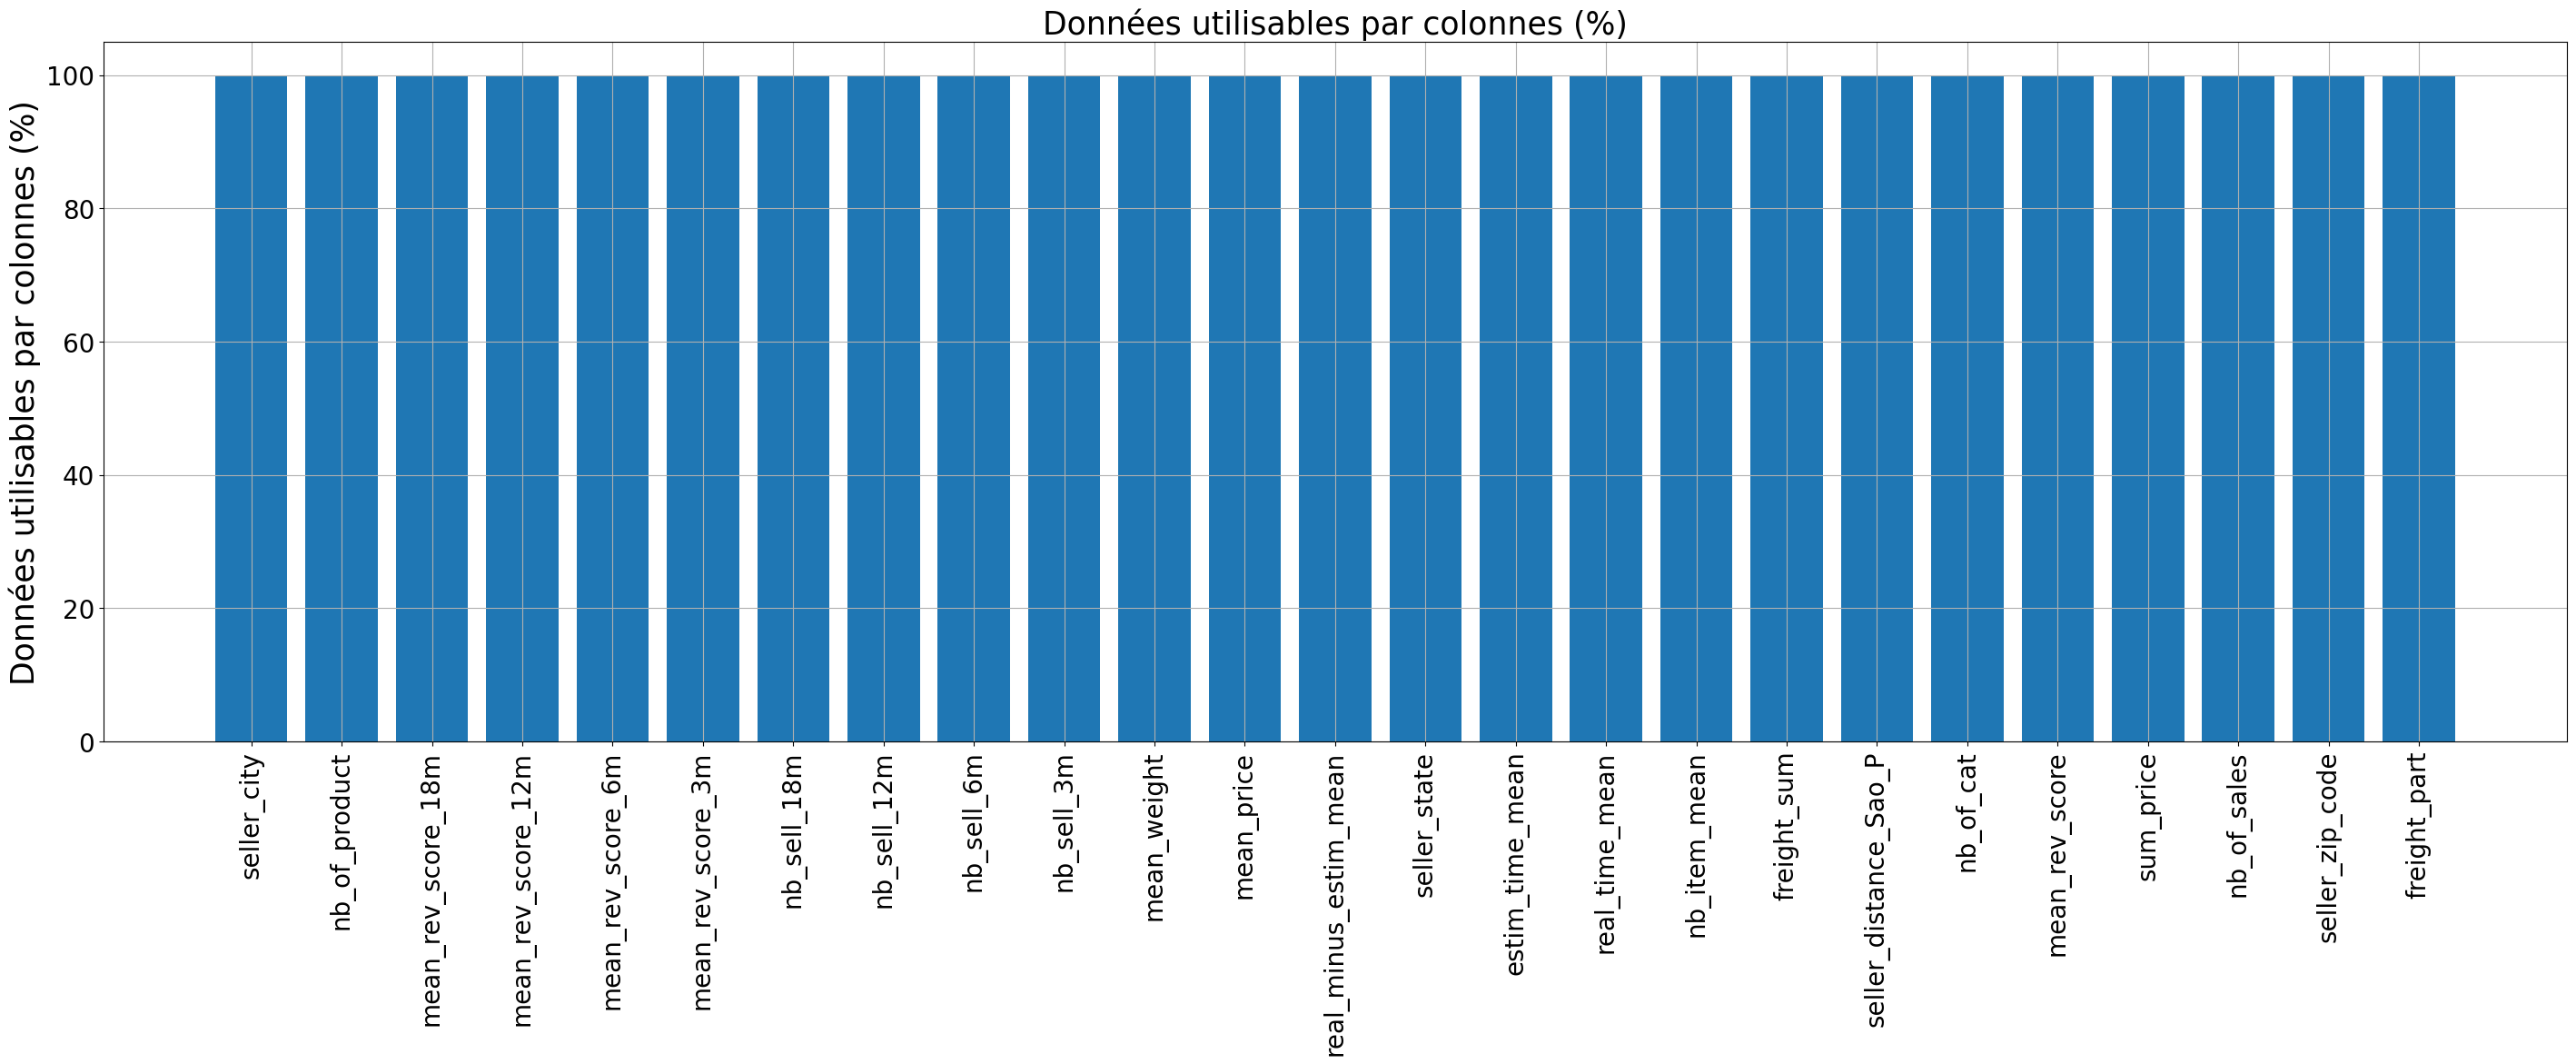

In [169]:
plot_valeurs_utilisables(Df2)

In [188]:

Df2 = Df2.drop('seller_city',axis=1)
Df2 = Df2.drop('seller_state',axis=1)
Df2 = Df2.drop('seller_zip_code',axis=1)
#Df2 = Df2.drop('nb_of_sales',axis=1)
#Df2 = Df2.drop('sum_price',axis=1)
#Df2 = Df2.drop('mean_rev_score',axis=1)
Df2 = Df2.drop('nb_of_cat',axis=1)
#Df2 = Df2.drop('seller_distance_Sao_P',axis=1)
Df2 = Df2.drop('freight_sum',axis=1)
Df2 = Df2.drop('nb_item_mean',axis=1)
#Df2 = Df2.drop('real_time_mean',axis=1)
#Df2 = Df2.drop('estim_time_mean',axis=1)
Df2 = Df2.drop('nb_of_product',axis=1)
Df2 = Df2.drop('mean_price',axis=1)
Df2 = Df2.drop('mean_weight',axis=1)
Df2 = Df2.drop('real_minus_estim_mean',axis=1)
#Df2 = Df2.drop('freight_part',axis=1)
Df2 = Df2.drop('mean_rev_score_3m',axis=1)
Df2 = Df2.drop('mean_rev_score_6m',axis=1)
Df2 = Df2.drop('mean_rev_score_12m',axis=1)
Df2 = Df2.drop('mean_rev_score_18m',axis=1)

len(Df2.columns)


12

In [171]:
#Ne pas supprimer !!!!!!!!!!!!!!!
#!!!!!!!!!!!

#Df2 = Df2.drop('seller_city',axis=1)
#Df2 = Df2.drop('seller_state',axis=1)
#Df2 = Df2.drop('seller_zip_code',axis=1)
#Df2 = Df2.drop('nb_of_sales',axis=1)
#Df2 = Df2.drop('sum_price',axis=1)
#Df2 = Df2.drop('mean_rev_score',axis=1)
Df2 = Df2.drop('nb_of_cat',axis=1)
Df2 = Df2.drop('seller_distance_Sao_P',axis=1)
#Df2 = Df2.drop('freight_sum',axis=1)
Df2 = Df2.drop('nb_item_mean',axis=1)
#Df2 = Df2.drop('real_time_mean',axis=1)
Df2 = Df2.drop('estim_time_mean',axis=1)
Df2 = Df2.drop('nb_of_product',axis=1)
#Df2 = Df2.drop('mean_price',axis=1)
Df2 = Df2.drop('mean_weight',axis=1)
Df2 = Df2.drop('real_minus_estim_mean',axis=1)
Df2 = Df2.drop('freight_part',axis=1)
Df2 = Df2.drop('payment_mean',axis=1)

len(Df2.columns)


KeyError: "['nb_of_cat'] not found in axis"

In [160]:
Df2.nunique()/len(Df2)*100

seller_zip_code           73.259821
nb_of_sales                8.511371
sum_price                 91.557547
mean_rev_score            27.946244
seller_distance_Sao_P     73.259821
real_time_mean           100.000000
estim_time_mean          100.000000
nb_sell_3m                 3.376981
nb_sell_6m                 4.893177
nb_sell_12m                7.133012
nb_sell_18m                8.166782
dtype: float64

In [189]:
laben = preprocessing.LabelEncoder()

cols_to_encode = Df2.select_dtypes(include=['object','string']).columns

laben = preprocessing.LabelEncoder()

#encodons les valeurs non numériques
for encode in cols_to_encode :
    Df2[encode] = laben.fit_transform(Df2[encode])

In [190]:
X= Df2.values

from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [191]:
from sklearn import decomposition
n_comp = X.shape[1]
print(n_comp)

pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

12


PCA(n_components=12)

[0.43675418 0.60034031 0.72021566 0.80537369 0.87110583 0.91253475
 0.94771902 0.97495556 0.99391519 0.99847703 0.99975109 1.        ]


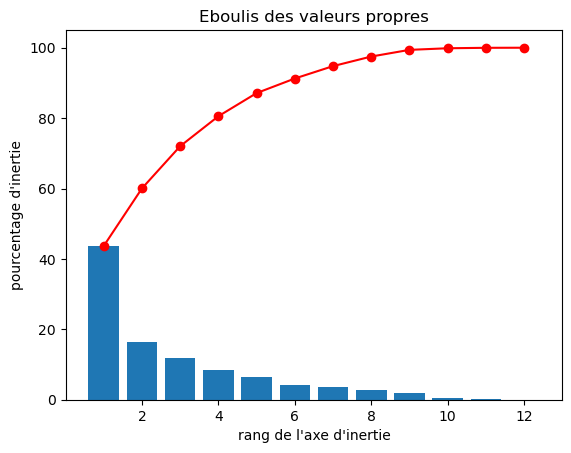

In [192]:
print(pca.explained_variance_ratio_.cumsum())
# Eboulis des valeurs propres
display_scree_plot(pca)

Silhouette Coefficient avec 2 clusters : 0.955
Silhouette Coefficient avec 3 clusters : 0.874
Silhouette Coefficient avec 4 clusters : 0.773
Silhouette Coefficient avec 5 clusters : 0.773
Silhouette Coefficient avec 6 clusters : 0.753
Silhouette Coefficient avec 7 clusters : 0.709


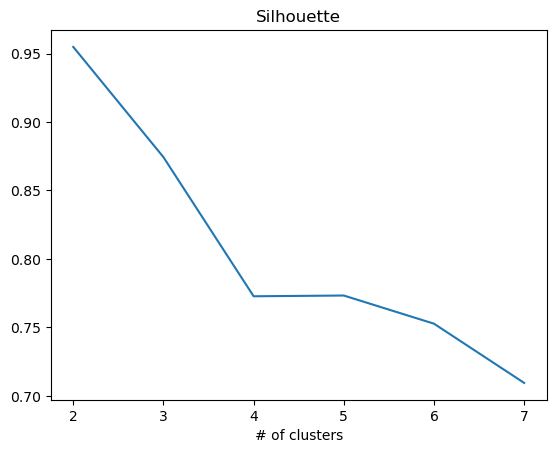

best nb_cluster :  
 Silhouette Coefficient avec 5 clusters : 0.773


KMeans(n_clusters=5)

In [193]:
# 1. Choisissons le clustering avec kmeans
Max_clust = 8
min_clust = 2
list_clust = list(range(min_clust,Max_clust))
res= np.zeros(Max_clust)
nb_cluster= 0

from sklearn import cluster

for clusters in list_clust:
    myclust = cluster.KMeans(n_clusters=clusters,n_init=20)
    myclust.fit(X)
    
    res[clusters] = metrics.silhouette_score(X, myclust.labels_)
    
    if res[clusters]> res[nb_cluster] and clusters>3 :
        nb_cluster = clusters
    
    # Pour l’évaluation intrinsèque, je choisis le coefficient de silhouette :
    print("Silhouette Coefficient avec",clusters,"clusters : %0.3f"
        % res[clusters])


#graphique
plt.title("Silhouette")
plt.xlabel("# of clusters")
plt.plot(list_clust,res[min_clust:])
plt.show()
print('best nb_cluster :  \n',"Silhouette Coefficient avec",nb_cluster,"clusters : %0.3f"
        % res[nb_cluster])

#nb_cluster=2
myclust = cluster.KMeans(n_clusters=nb_cluster)
myclust.fit(X)

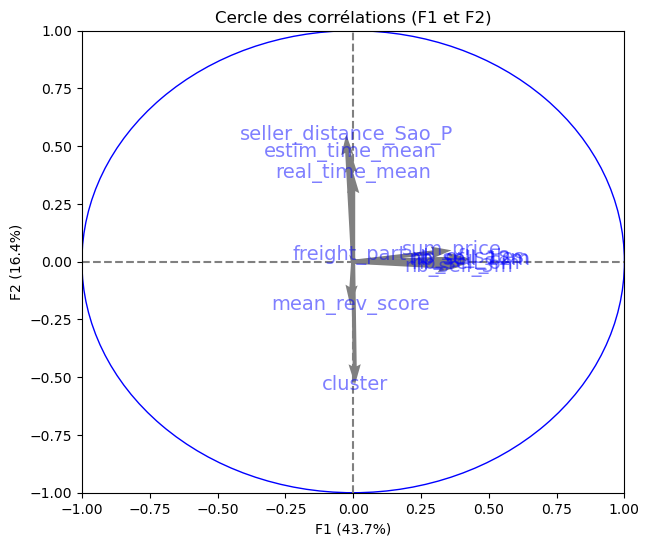

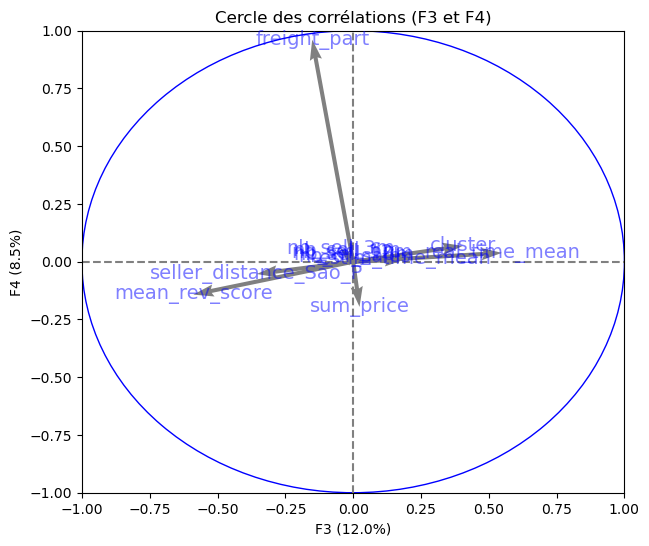

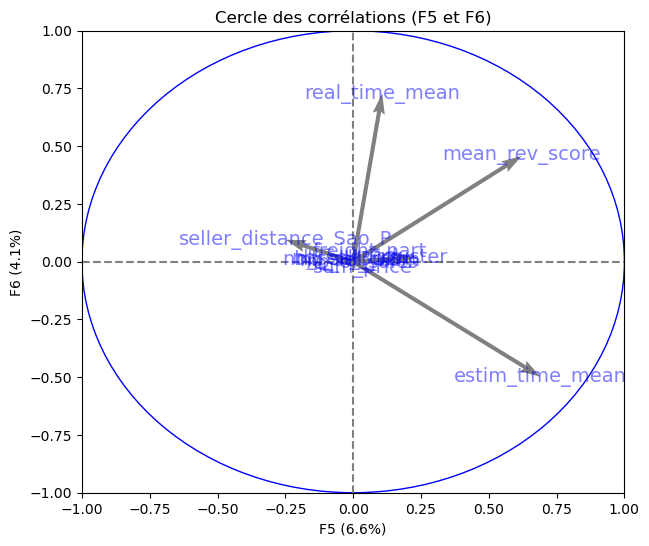

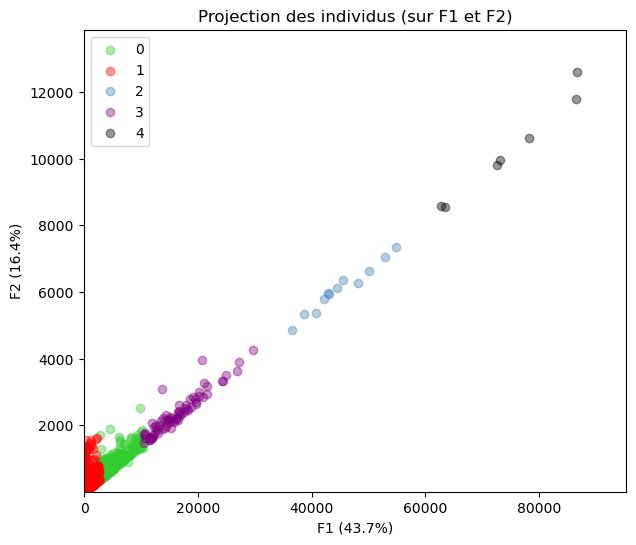

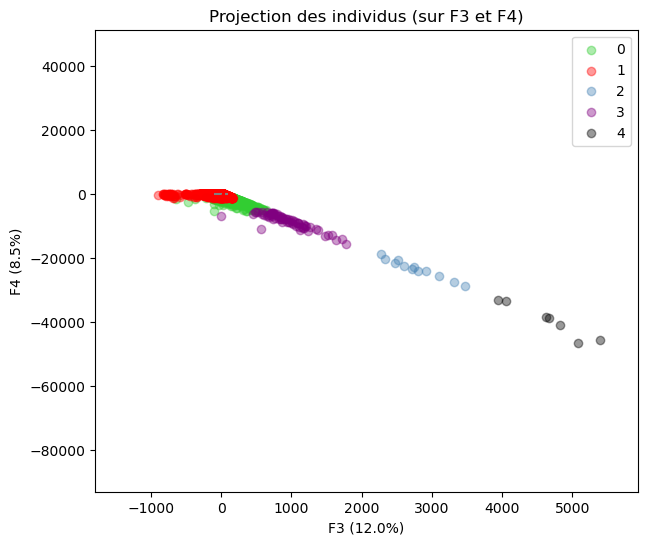

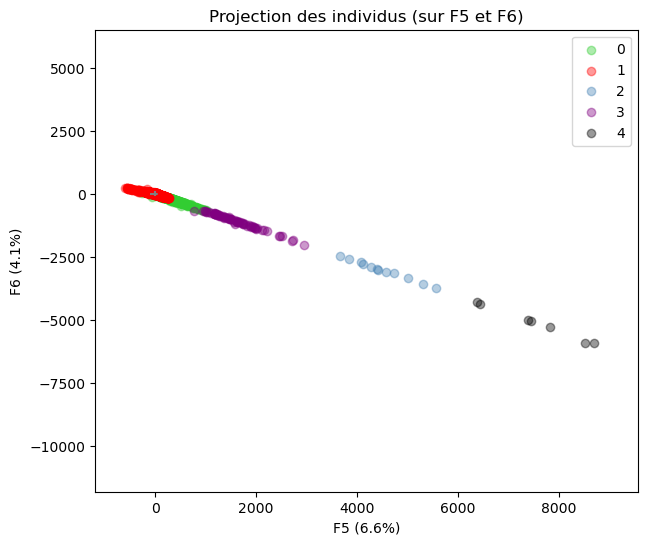

In [194]:
# Cercle des corrélations
pcs = pca.components_



# Projection des individus
X_projected = pca.transform(X)
grade = myclust.labels_
features = Df2.columns

display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))

display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)],  illustrative_var = grade, alpha=.4)

plt.show()

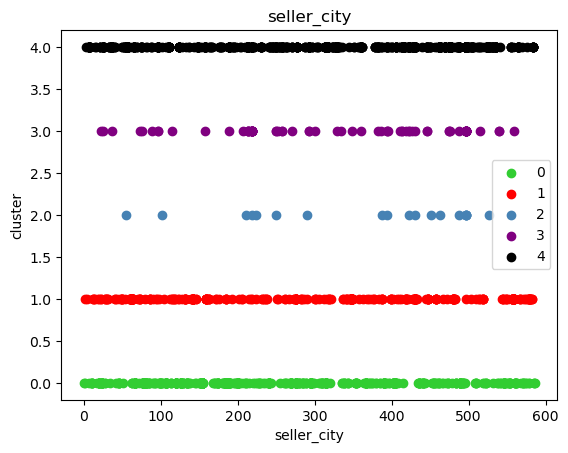

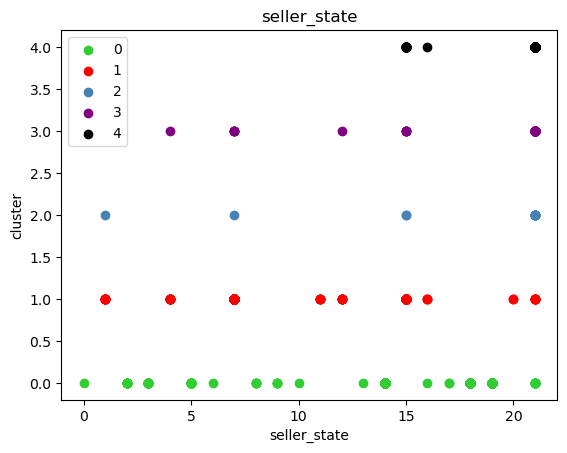

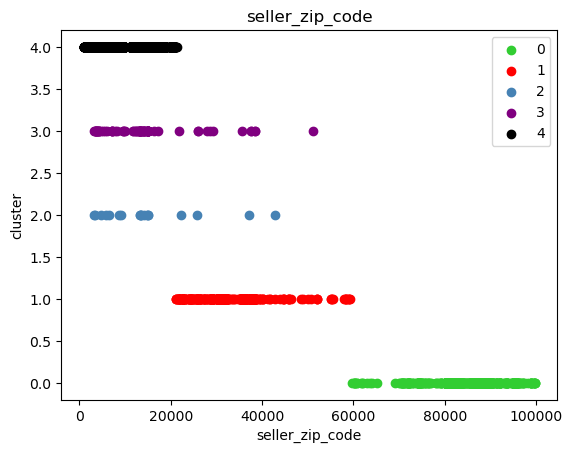

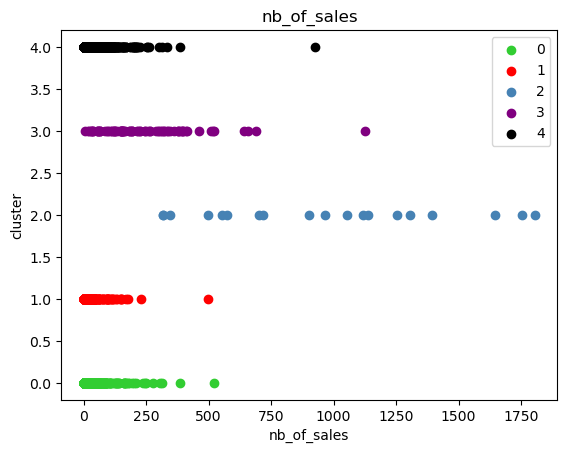

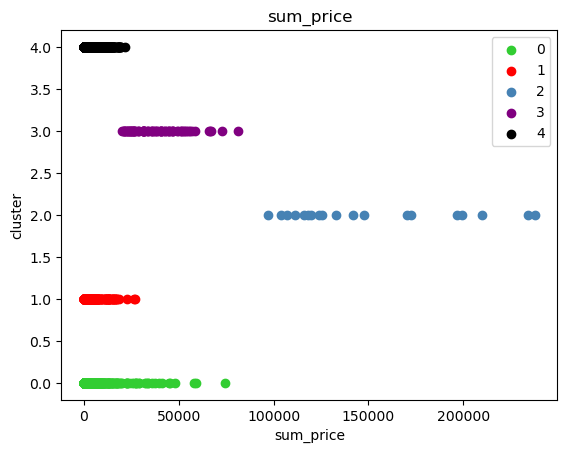

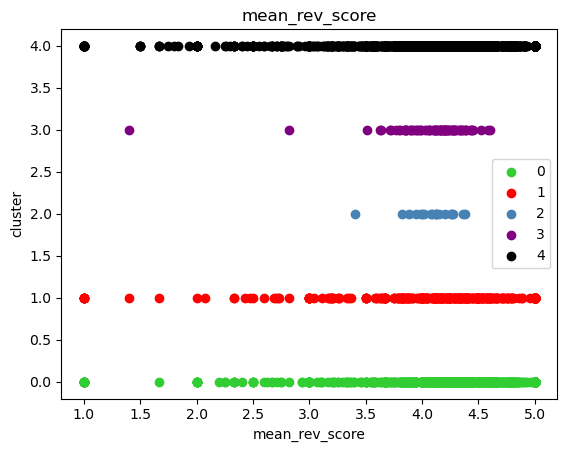

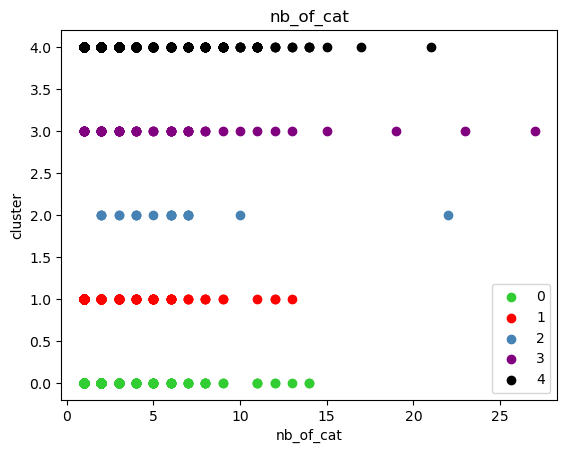

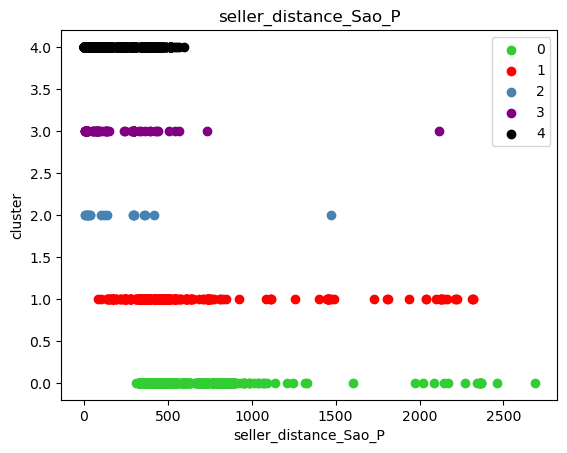

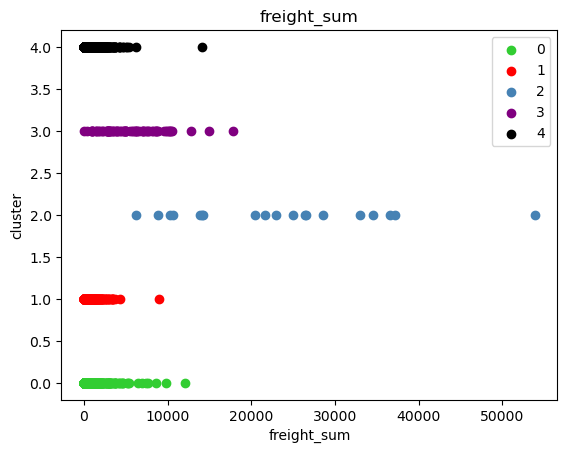

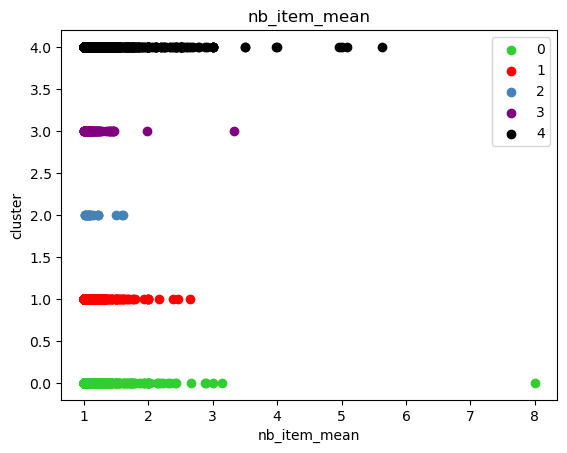

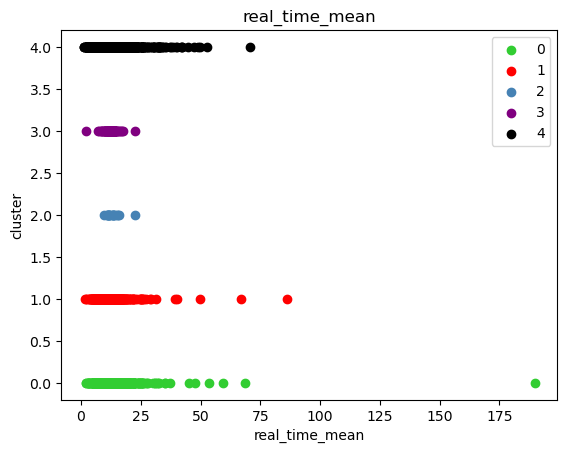

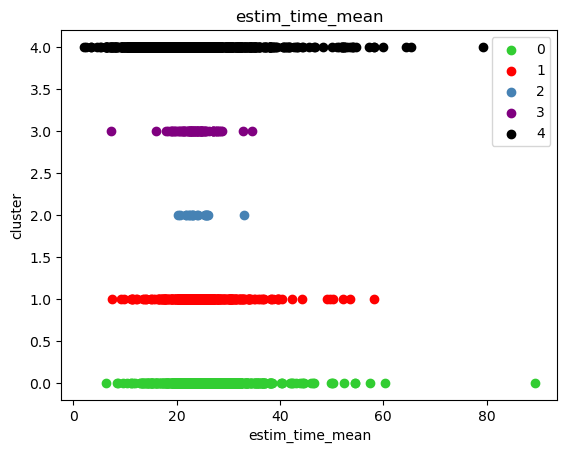

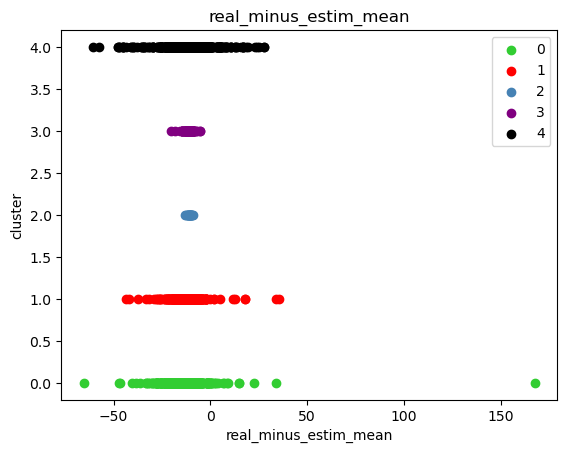

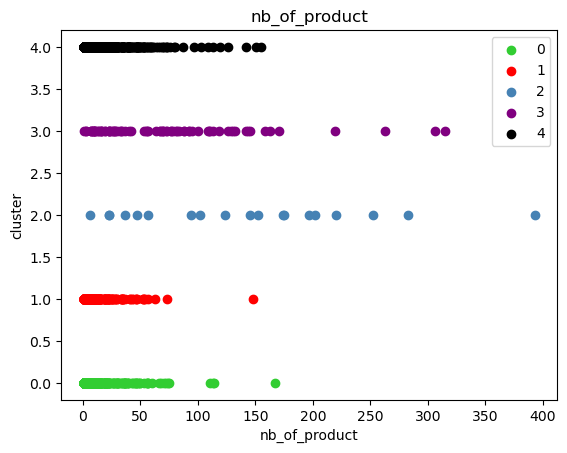

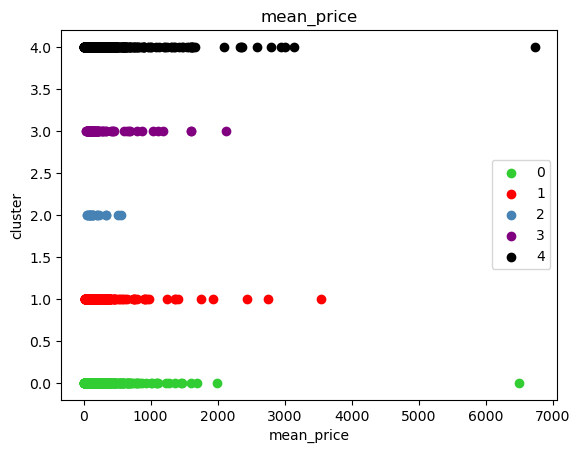

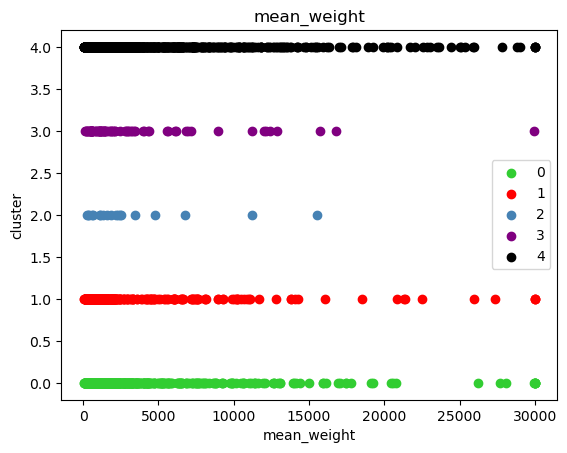

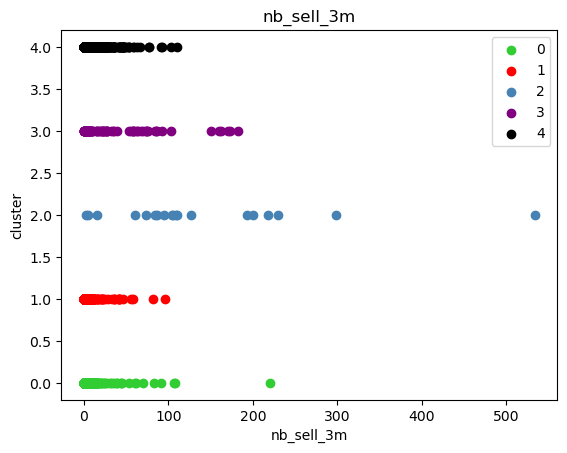

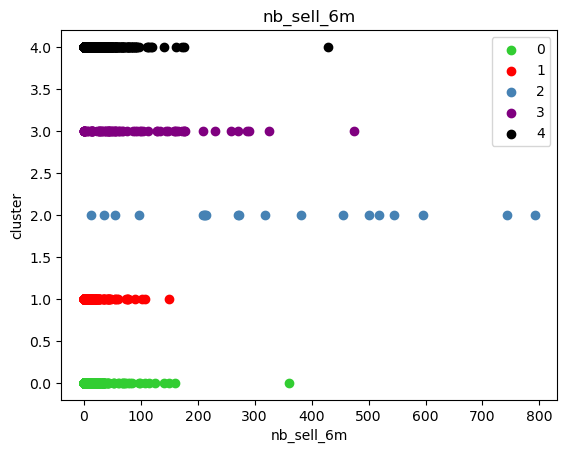

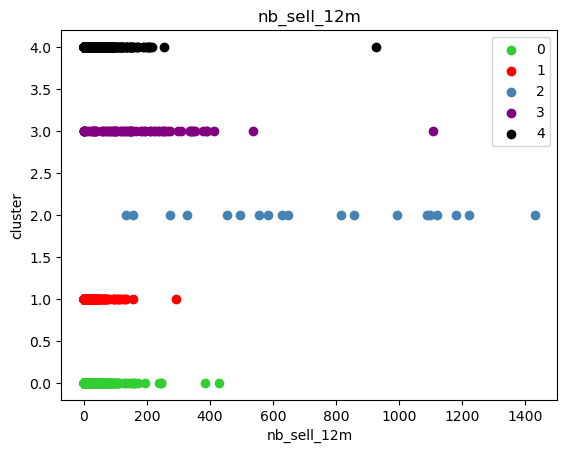

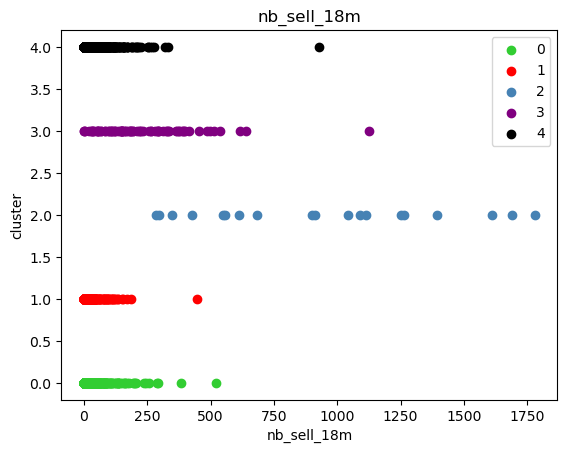

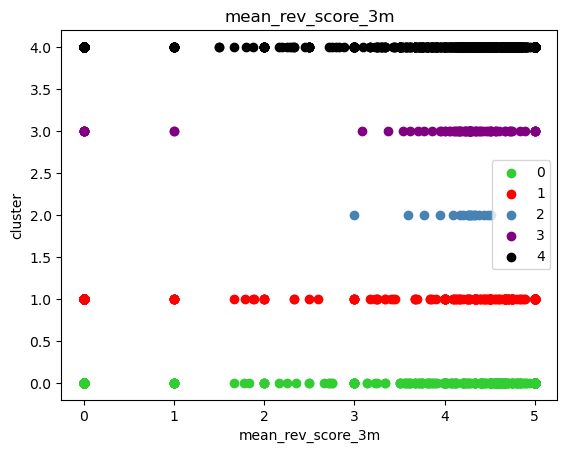

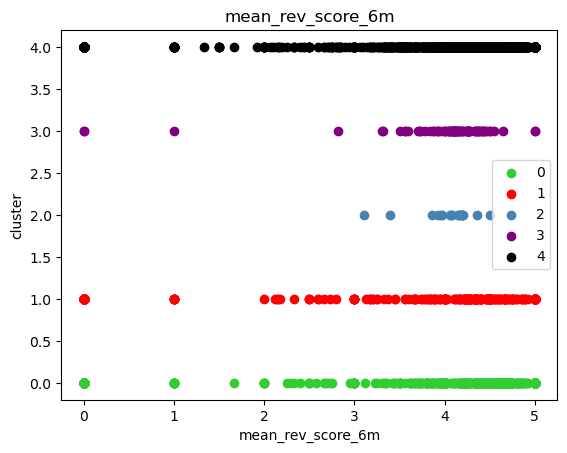

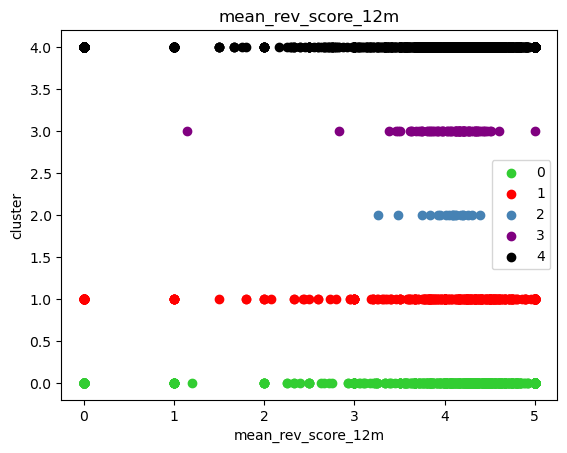

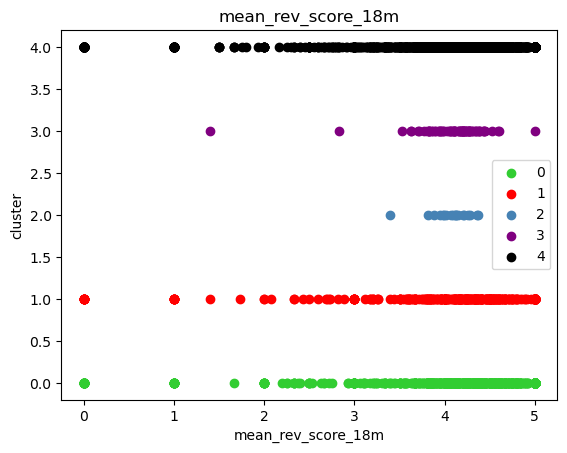

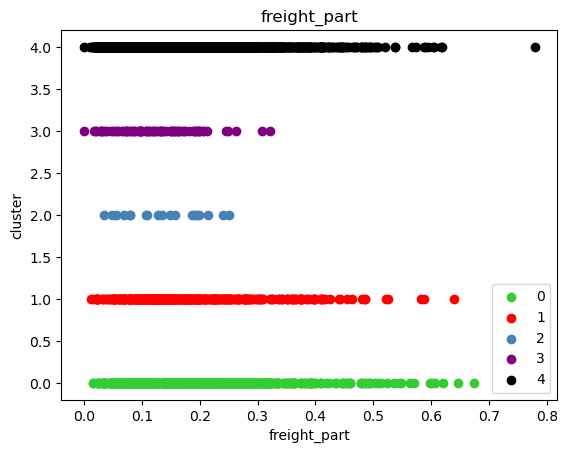

In [187]:
Df_plot = Df2
Df_plot['cluster'] =  myclust.labels_

for col in Df_plot.columns[:-1] :
    for clust in list(range(0,nb_cluster)) :

        plt.scatter(Df_plot[col].loc[Df_plot['cluster'] == clust],Df_plot["cluster"].loc[Df_plot['cluster'] == clust], c= colors[clust])
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('cluster')
    plt.legend(list(range(0,nb_cluster)))
    plt.show()

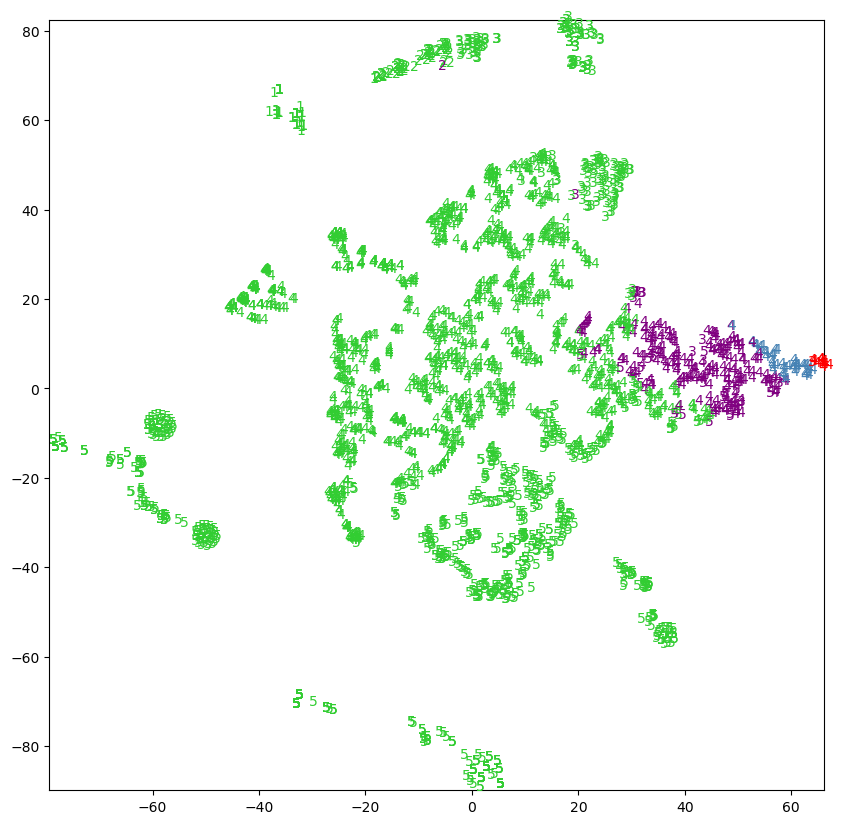

In [140]:
if len(Df2)<10000 :
    # Puis on applique tSNE aux données scalées :
    from sklearn import manifold
    tsne = manifold.TSNE(n_components=2, init='pca')
    X_trans = tsne.fit_transform(X_scaled)

    # Puis on visualise, selon la méthode donnée dans le coup de pouce :
    from matplotlib import pyplot as plt # Dans Jupyter : % pylab inline
    plt.figure(figsize=(10,10))

    for i in range(X.shape[0]): # pour chaque point
        plt.text(X_trans[i, 0], X_trans[i, 1], str('%s' % round(X[i,1])),
                color=colors[myclust.labels_[i]])

    # On redéfinit les axes pour bien voir tous les points
    plt.xlim([np.min(X_trans[:, 0]), np.max(X_trans[:, 0])])
    plt.ylim([np.min(X_trans[:, 1]), np.max(X_trans[:, 1])])

    # On affiche l'image
    plt.show()

In [141]:
Df2[myclust.labels_==0].describe().drop(['std','25%','50%','75%'])

,nb_of_sales,mean_rev_score,nb_sell_3m,nb_sell_6m,nb_sell_12m,nb_sell_18m,cluster
count,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2577.00000,2577.0
mean,11.389212,4.163007,2.818005,4.941017,8.123787,10.27241,0.0
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.0
max,125.000000,5.000000,46.000000,51.000000,60.000000,81.00000,0.0


In [142]:
Df2[myclust.labels_==1].describe().drop(['std','25%','50%','75%'])

,nb_of_sales,mean_rev_score,nb_sell_3m,nb_sell_6m,nb_sell_12m,nb_sell_18m,cluster
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.0
mean,1260.307692,3.990617,182.769231,456.153846,1005.384615,1238.538462,1.0
min,902.000000,3.400692,60.000000,211.000000,585.000000,902.000000,1.0
max,1805.000000,4.257985,534.000000,792.000000,1430.000000,1780.000000,1.0


In [143]:
Df2[myclust.labels_==2].describe().drop(['std','25%','50%','75%'])

,nb_of_sales,mean_rev_score,nb_sell_3m,nb_sell_6m,nb_sell_12m,nb_sell_18m,cluster
count,48.00,48.000000,48.000000,48.000,48.000000,48.000000,48.0
mean,402.25,4.075909,69.583333,148.875,290.145833,383.979167,2.0
min,237.00,3.391720,0.000000,0.000,0.000000,237.000000,2.0
max,716.00,4.442935,220.000000,519.000,629.000000,685.000000,2.0


In [144]:
Df2[myclust.labels_==3].describe().drop(['std','25%','50%','75%'])

,nb_of_sales,mean_rev_score,nb_sell_3m,nb_sell_6m,nb_sell_12m,nb_sell_18m,cluster
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.0
mean,120.257576,4.101066,21.772727,45.693182,88.852273,113.806818,3.0
min,54.000000,2.259843,0.000000,0.000000,0.000000,1.000000,3.0
max,345.000000,4.822581,108.000000,176.000000,217.000000,268.000000,3.0


In [145]:
Df2[myclust.labels_==4].describe().drop(['std','25%','50%','75%'])

,nb_of_sales,mean_rev_score,nb_sell_3m,nb_sell_6m,nb_sell_12m,nb_sell_18m,cluster
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
Df2[myclust.labels_==5].describe().drop(['std','25%','50%','75%'])


,nb_of_sales,mean_rev_score,nb_sell_6m,nb_sell_12m,nb_sell_18m,mean_rev_score_6m,mean_rev_score_12m,mean_rev_score_18m,cluster
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


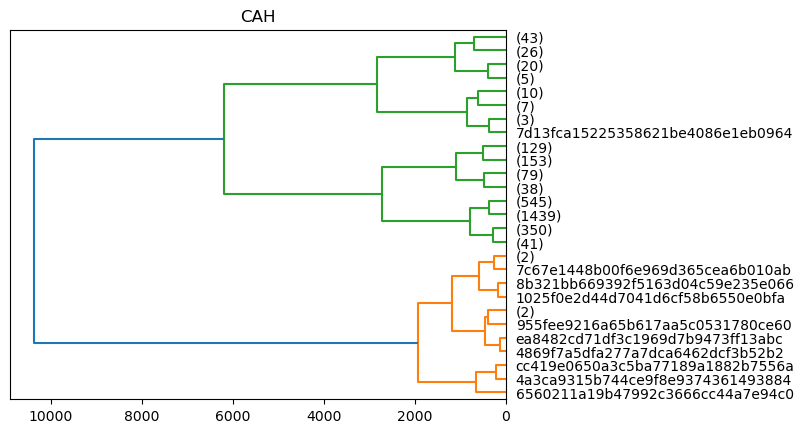

In [126]:
#librairies pour la CAH
from scipy.cluster.hierarchy import dendrogram, linkage

#générer la matrice des liens
Z = linkage(Df2,method='ward',metric='euclidean')
#affichage du dendrogramme
plt.title("CAH")
dendrogram(Z,labels=Df2.index,orientation='left',p=nb_cluster,truncate_mode= 'level')
plt.show()

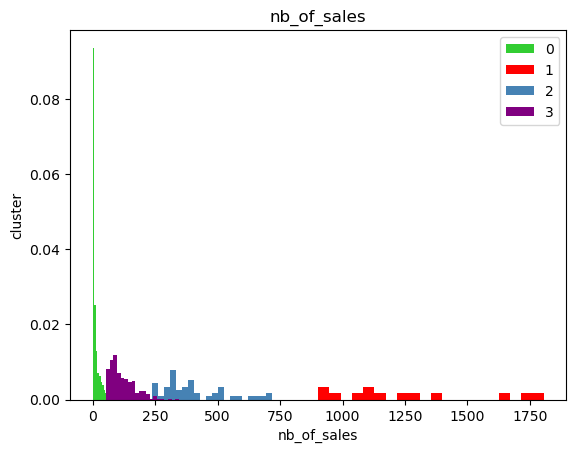

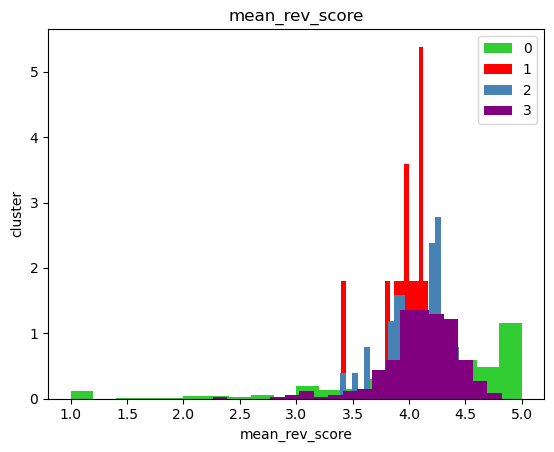

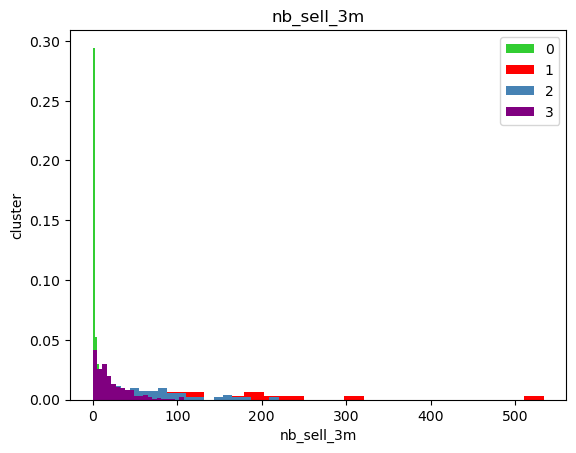

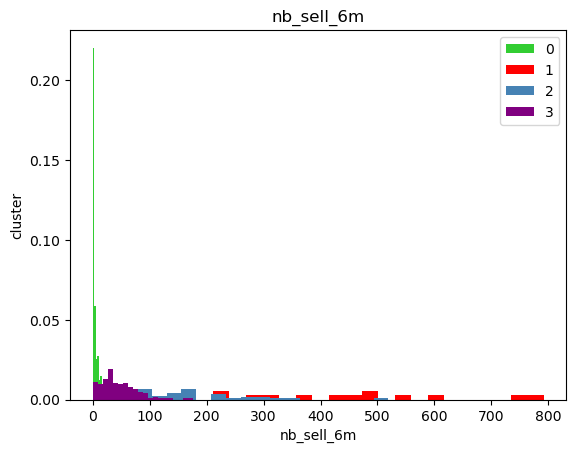

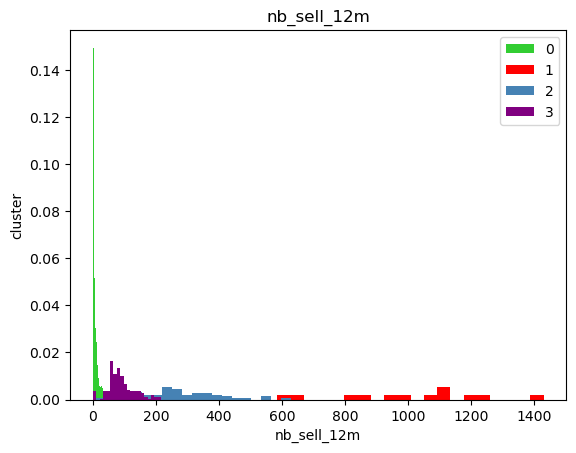

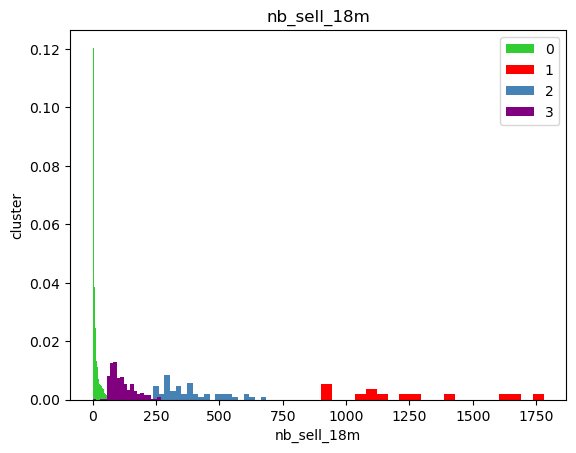

In [146]:
Df_plot = Df2
Df_plot['cluster'] =  myclust.labels_

for col in Df_plot.columns[:-1] :
    for clust in list(range(0,nb_cluster)) :

        plt.hist(Df_plot[col].loc[Df_plot['cluster'] == clust],bins=20,density=True, color= colors[clust])
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('cluster')
    plt.legend(list(range(0,nb_cluster)))
    plt.show()